### Teste t para uma diferença de duas médias populacionais

In [44]:
from scipy.stats import norm, shapiro, ttest_ind_from_stats, f, t, ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Exercício 3 - amostras independentes

In [3]:
agg1 = "551 457 450 731 499 632".split()
agg1 = [int(x) for x in agg1]
agg2 = "639 615 511 573 648 601".split()
agg2 = [int(x) for x in agg2]

In [5]:
print(np.mean(agg1))
print(np.mean(agg2))

553.3333333333334
597.8333333333334


In [7]:
print(np.var(agg1))
print(np.var(agg2))

10111.555555555557
2112.138888888889


Teste de Normalidade<br>

Teste de Shapiro-Wilk
- H0: os dados seguem distribuição normal
- H1: os dados não seguem dist. normal<br><br>

p-valor < 0.01 então rejeita-se H0 <br>
p-valor > 0.01 então falha-se ao rejeitar H0


In [9]:
print(shapiro(agg1).pvalue)
print(shapiro(agg2).pvalue)

0.4076658530039959
0.4898894151583155


Não rejeitamos nenhuma das hipóteses nulas. Os dados seguem distribuição normal.

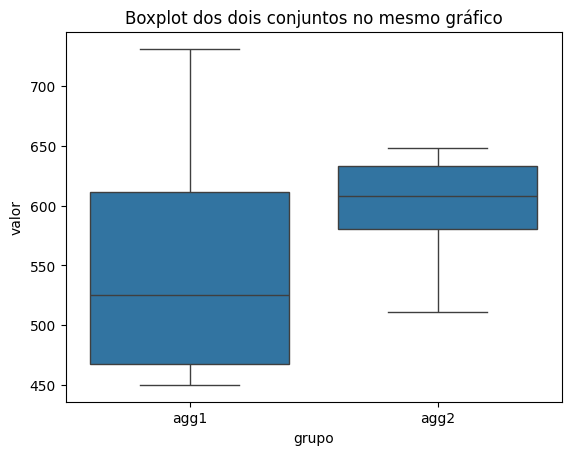

In [20]:
df = pd.DataFrame({
    'valor': agg1 + agg2,
    'grupo': ['agg1'] * len(agg1) + ['agg2'] * len(agg2)  # Identifica de qual grupo cada valor é
})

sns.boxplot(x='grupo', y='valor', data=df)
plt.title('Boxplot dos dois conjuntos no mesmo gráfico')
plt.show()

In [22]:
cv1 = np.std(agg1)/np.mean(agg1)
cv2 = np.std(agg2)/np.mean(agg2)
print(cv1*100)
print(cv2*100)

18.172812797744196
7.68742886616541


Teste de homogeneidade de duas variancias

- H0: variancia1 = variancia2 (variancias homogeneas)
- H1: variancia1 != variancia2 (variancias heterogeneas)<br><br>

p-valor < 0.01 então rejeita-se H0 <br>
p-valor > 0.01 então falha-se ao rejeitar H0

In [27]:

# Calcula variâncias e tamanhos
var1 = np.var(agg1, ddof=1)
var2 = np.var(agg2, ddof=1)
n1 = len(agg1)
n2 = len(agg2)

# Estatística F: maior variância sobre menor
if var1 > var2:
    f_stat = var1 / var2
    dfn, dfd = n1 - 1, n2 - 1
else:
    f_stat = var2 / var1
    dfn, dfd = n2 - 1, n1 - 1

p_value = 2 * min(f.cdf(f_stat, dfn, dfd), 1 - f.cdf(f_stat, dfn, dfd))

alpha = 0.01

print(f'Estatística F: {f_stat:.4f}')
print(f'p-valor: {p_value:.4f}')
if p_value > alpha:
    print('Variâncias homogêneas (falha em rejeitar H0)')
else:
    print('Variâncias heterogêneas (rejeita H0)')

Estatística F: 4.7874
p-valor: 0.1107
Variâncias homogêneas (falha em rejeitar H0)


In [37]:
# Estatísticas básicas
mean1, std1, n1 = np.mean(agg1), np.std(agg1, ddof=1), len(agg1)
mean2, std2, n2 = np.mean(agg2), np.std(agg2, ddof=1), len(agg2)

# Teste t com variâncias iguais (como var.equal=TRUE no R)
t_result = ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=True)

# Saída
print(f"p-valor: {t_result.pvalue:.4f}")

p-valor: 0.3893


Conclusão: Como p-valor = 0.3893 > 0.01, então não se rejeita H0 ao nível de significancia de 1% e conclui-se que a absorção média de uma mistura em concreto para os dois agregados são estatisticamente iguais.

#### Exercício 4 - amostras dependentes

In [38]:
sem_prod = "80.5 99.6 99.4 100.2 81.5 84.6 85.0 105.8".split()
sem_prod = [float(x) for x in sem_prod]
com_prod = " 75.8 98.8 77.6 99.9 74.2 80.5 83.6 105.8".split()
com_prod = [float(x) for x in com_prod]

Teste de normalidade Shapiro-Wilk

p-valor < 0.05 então rejeita-se H0<br>
p-valor > 0.05 não-rejeita-se H0

In [43]:
print(round(shapiro(sem_prod).pvalue, 5))
print(round(shapiro(com_prod).pvalue, 5))

0.09314
0.12097


Para ambas as amostras os dados seguem dist. normal

In [47]:
resultado = ttest_rel(sem_prod, com_prod, alternative="greater")

print(resultado.pvalue)

0.044411576594277156


Conclusão: como o p-valor = 0.044 < 0.05, então rejeita-se H0 ao nível de significância de 5% e conclui-se que a temperatura media dos motores após a aplicação do produto diminuiu.